In [ ]:
from google.colab import files
files.upload()  # Manually upload dataset

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
df.head()

if 'Genre' in df.columns:
    df.rename(columns={'Genre': 'Gender'}, inplace=True)

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop missing values (if any)
df.dropna(inplace=True)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Encode 'Gender' (Target Variable)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Select Features (Independent Variables)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Gender']  # Target Variable

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 160 rows
Test set size: 40 rows


In [ ]:
# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        21
           1       0.64      0.47      0.55        19

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.61        40
weighted avg       0.63      0.62      0.62        40



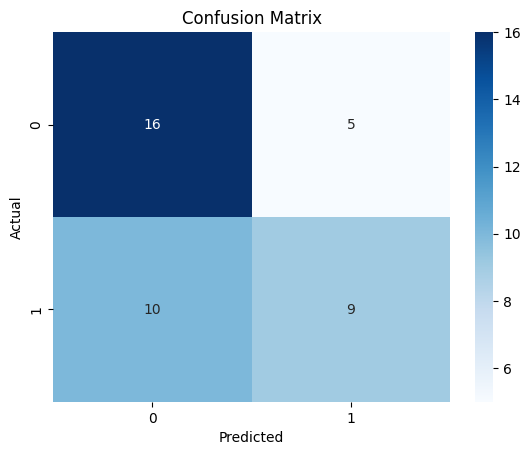

Model Accuracy: 0.625


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")